In [2]:
import opendatasets as od 

#downloading the dataset from kaggle
#d.download("https://www.kaggle.com/mlg-ulb/creditcardfraud")

In [3]:
# Importing  the libraries 
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import roc_auc_score
import time
import warnings
warnings.filterwarnings('ignore')

In [4]:
#df = pd.read_csv("creditcardfraud/creditcard.csv")
#print("There are " +  str(len(df)) + " Observations in this datasets")
#print("There are " +  str(len(df.columns)) + " variables in this datasets")

In [5]:
## had to switch to using the url, becos the file was too big to commit to git. 
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/creditcard.csv"
df = raw_data=pd.read_csv(url)
print("There are " +  str(len(df)) + " Observations in this datasets")
print("There are " +  str(len(df.columns)) + " variables in this datasets")

There are 284807 Observations in this datasets
There are 31 variables in this datasets


In [6]:
## we want a bigger data set, so we will inflate this data set by ten times 

replicas_ = 10 

big_df = pd.DataFrame(np.repeat(df.values, replicas_, axis=0), columns=df.columns)
print("There are now " +  str(len(big_df)) + " Observations in this datasets")
print("There are now " +  str(len(big_df.columns)) + " variables in this datasets")

There are now 2848070 Observations in this datasets
There are now 31 variables in this datasets


In [7]:
big_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
2,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
3,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
4,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0


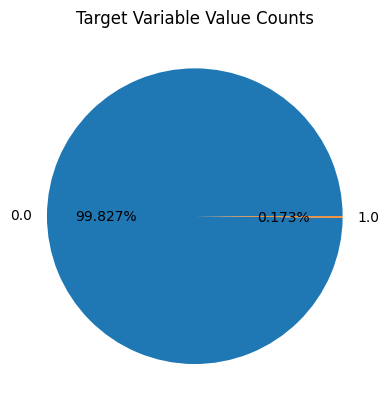

In [8]:
# get the set of distinct classes
labels = big_df.Class.unique()

# get the count of each class
sizes = big_df.Class.value_counts().values

# plot the class value counts
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.3f%%')
ax.set_title('Target Variable Value Counts')
plt.show()

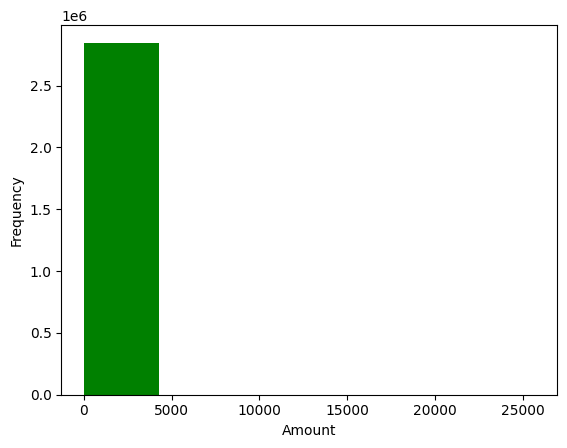

Minimum amount value is  0.0
Maximum amount value is  25691.16
90% of the transactions have an amount less or equal than  203.0


In [9]:
# we provide our solution here
plt.hist(big_df.Amount.values, 6, histtype='bar', facecolor='g')
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

print("Minimum amount value is ", np.min(big_df.Amount.values))
print("Maximum amount value is ", np.max(big_df.Amount.values))
print("90% of the transactions have an amount less or equal than ", np.percentile(big_df.Amount.values, 90))

Data Processing 
data preprocessing such as scaling/normalization is typically useful for linear models to accelerate the training convergence